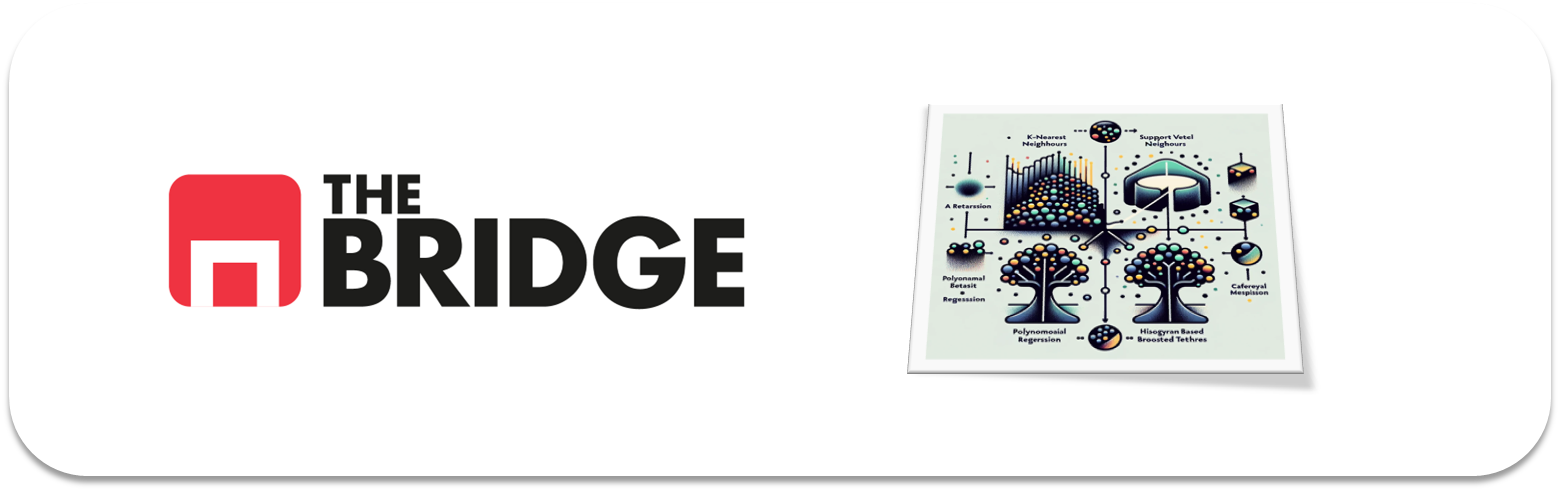

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [4]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bviz  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, recall_score
from sklearn.metrics import mean_squared_error, r2_score  

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [8]:
# Cargar el dataset
csv_wines = r"C:\Users\anton\SUBIR_EJERCICIOS_THEBRIDGE\EJERCICIOS_THEBRIDGE\Sprint-12\Obligatoria2\data\wines_dataset.csv"
df = pd.read_csv(csv_wines, encoding="utf-8", sep="|")

# Mostrar las primeras filas del dataset
print(df.head())

# Mostrar información general del dataset
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.5              0.21         0.26            9.25      0.034   
1            8.3              0.16         0.37            7.90      0.025   
2            6.8              0.18         0.38            1.40      0.038   
3            6.1              0.26         0.25            2.90      0.047   
4            7.5              0.63         0.27            2.00      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 73.0                 142.0  0.99450  3.05       0.37   
1                 38.0                 107.0  0.99306  2.93       0.37   
2                 35.0                 111.0  0.99180  3.32       0.59   
3                289.0                 440.0  0.99314  3.44       0.64   
4                 17.0                  91.0  0.99616  3.26       0.58   

   alcohol  quality  class  
0     11.4        6  white  
1     11.9        6  white  

In [9]:
# Mostrar los nombres de las columnas en el dataset
print("Nombres de las columnas en el dataset:")
print(df.columns)


Nombres de las columnas en el dataset:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')


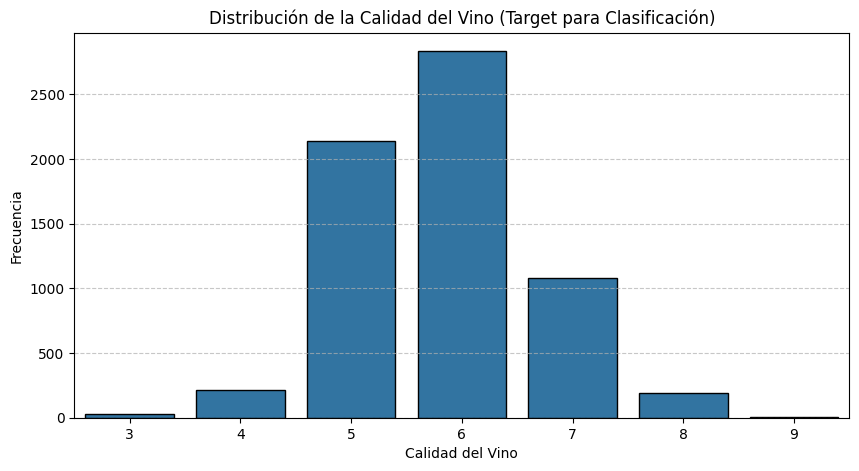

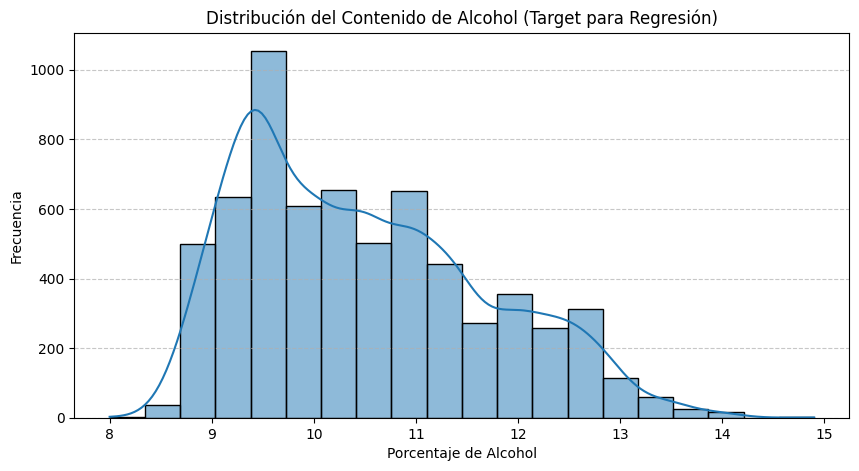


**Análisis Preliminar**
1. **Problema de Clasificación (Predecir 'quality')**
- La distribución está sesgada: la mayoría de las muestras están entre 5 y 7.
- Puede haber un problema de desequilibrio de clases.
- La métrica clave será el recall medio (Recall Macro o Balanced Accuracy).

2. **Problema de Regresión (Predecir 'alcohol')**
- La distribución parece aproximadamente normal con una ligera asimetría.
- Se recomienda usar métricas como el MAPE para minimizar errores porcentuales.


In [10]:


# Definir las variables target
target_clasificacion = "quality"  # Para clasificación
target_regresion = "alcohol"  # Para regresión

# Distribución de la variable target para clasificación (quality)
plt.figure(figsize=(10, 5))
sns.countplot(x=df[target_clasificacion], edgecolor='black')
plt.title("Distribución de la Calidad del Vino (Target para Clasificación)")
plt.xlabel("Calidad del Vino")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribución de la variable target para regresión (alcohol)
plt.figure(figsize=(10, 5))
sns.histplot(df[target_regresion], bins=20, kde=True, edgecolor='black')
plt.title("Distribución del Contenido de Alcohol (Target para Regresión)")
plt.xlabel("Porcentaje de Alcohol")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Análisis preliminar de los problemas
print("\n**Análisis Preliminar**")
print("1. **Problema de Clasificación (Predecir 'quality')**")
print("- La distribución está sesgada: la mayoría de las muestras están entre 5 y 7.")
print("- Puede haber un problema de desequilibrio de clases.")
print("- La métrica clave será el recall medio (Recall Macro o Balanced Accuracy).")

print("\n2. **Problema de Regresión (Predecir 'alcohol')**")
print("- La distribución parece aproximadamente normal con una ligera asimetría.")
print("- Se recomienda usar métricas como el MAPE para minimizar errores porcentuales.")


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [11]:
# 1. Definir variables y dividir en entrenamiento y test
target_classification = "quality"  # Variable objetivo para clasificación

# Definir características predictoras
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = df[features]  # Variables predictoras
y = df[target_classification]  # Variable objetivo

# División en entrenamiento y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Aplicar escalado a los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Aplicar SMOTE para balancear las clases
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)  # Ajustamos k_neighbors para evitar errores con clases minoritarias
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 4. Definir y entrenar el modelo KNN con búsqueda de hiperparámetros
from sklearn.model_selection import RandomizedSearchCV

knn = KNeighborsClassifier()

# Definir espacio de búsqueda de hiperparámetros
param_dist = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Validación cruzada con StratifiedKFold para evitar problemas con clases poco representadas
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3)  # Reducimos a 3 splits para evitar el error de clases minoritarias

# Implementar RandomizedSearchCV para encontrar los mejores hiperparámetros
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, 
                                   cv=cv, scoring='balanced_accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo encontrado
best_knn = random_search.best_estimator_

# 5. Evaluación del modelo
y_pred = best_knn.predict(X_test_scaled)

print(f"Mejor valor de k encontrado: {random_search.best_params_['n_neighbors']}")
print(f"Mejor weight encontrado: {random_search.best_params_['weights']}")
print(f"Mejor métrica encontrada: {random_search.best_params_['metric']}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

Mejor valor de k encontrado: 1
Mejor weight encontrado: uniform
Mejor métrica encontrada: euclidean
Accuracy: 0.6015
Balanced Accuracy: 0.3566

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.19      0.30      0.23        43
           5       0.68      0.66      0.67       428
           6       0.66      0.62      0.64       567
           7       0.54      0.55      0.55       216
           8       0.28      0.36      0.31        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.34      0.36      0.34      1300
weighted avg       0.62      0.60      0.61      1300



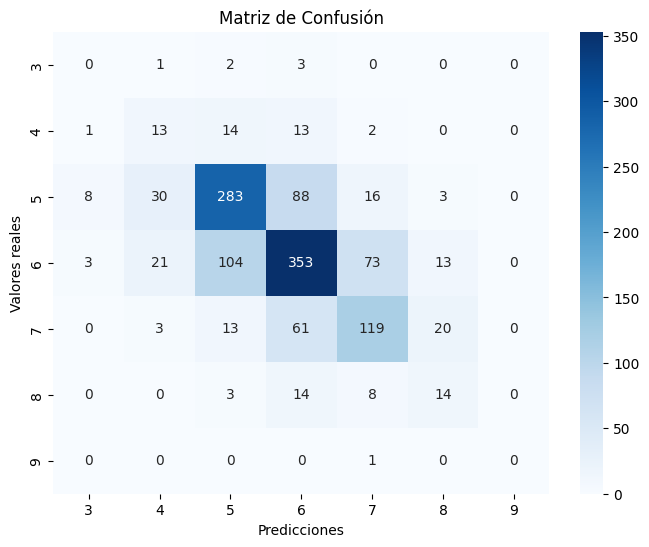

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.sort(y_test.unique()), yticklabels=np.sort(y_test.unique()))
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, scoring='balanced_accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo encontrado
best_knn = grid_search.best_estimator_

# Evaluación del modelo optimizado
y_pred = best_knn.predict(X_test_scaled)

print(f"Mejor valor de k encontrado: {grid_search.best_params_['n_neighbors']}")
print(f"Mejor weight encontrado: {grid_search.best_params_['weights']}")
print(f"Mejor métrica encontrada: {grid_search.best_params_['metric']}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

Mejor valor de k encontrado: 1
Mejor weight encontrado: uniform
Mejor métrica encontrada: euclidean
Accuracy: 0.6015
Balanced Accuracy: 0.3566

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.19      0.30      0.23        43
           5       0.68      0.66      0.67       428
           6       0.66      0.62      0.64       567
           7       0.54      0.55      0.55       216
           8       0.28      0.36      0.31        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.34      0.36      0.34      1300
weighted avg       0.62      0.60      0.61      1300



In [18]:
# PROBAMOS A HACER OTRO MODELO CON OTROS AJUSTES

# # 1. Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 2. Entrenar un modelo Random Forest y evaluar
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_scaled)

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy Random Forest:", balanced_accuracy_score(y_test, y_pred_rf))
print("Reporte de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# 3. Ajuste de hiperparámetros con RandomizedSearchCV en Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_rf,
    n_iter=10, 
    cv=3, 
    scoring='balanced_accuracy', 
    n_jobs=-1, 
    random_state=42
)

random_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf = random_search_rf.best_estimator_

# Evaluación del mejor modelo
y_pred_best_rf = best_rf.predict(X_test_scaled)
print("Mejor modelo Random Forest - Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Mejor modelo Random Forest - Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_best_rf))
print("Mejor modelo Random Forest - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_best_rf, zero_division=0))

rf_under = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_under.fit(X_train_under, y_train_under)
y_pred_rf_under = rf_under.predict(X_test_scaled)

print("Random Forest con UnderSampling - Accuracy:", accuracy_score(y_test, y_pred_rf_under))
print("Random Forest con UnderSampling - Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf_under))
print("Random Forest con UnderSampling - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf_under, zero_division=0))

Accuracy Random Forest: 0.6515384615384615
Balanced Accuracy Random Forest: 0.3918895406809525
Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.31      0.35      0.33        43
           5       0.72      0.71      0.72       428
           6       0.68      0.67      0.68       567
           7       0.59      0.60      0.59       216
           8       0.39      0.41      0.40        39
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1300
   macro avg       0.38      0.39      0.39      1300
weighted avg       0.65      0.65      0.65      1300

Mejor modelo Random Forest - Accuracy: 0.6453846153846153
Mejor modelo Random Forest - Balanced Accuracy: 0.38266839466501024
Mejor modelo Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0

NameError: name 'X_train_under' is not defined

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [24]:
# Importar modelos adicionales para regresión
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Definir features (X) y target (y)
X_reg = df.drop(columns=[target_classification, "class"])  # Quitamos la variable de clasificación y la clase
y_reg = df[target_regression]

# Dividir en entrenamiento y test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Escalar los datos
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Definir modelos para regresión
models = {
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Regresión Lineal": LinearRegression()
}

# Validación cruzada y evaluación inicial de modelos
best_model = None
best_rmse = float("inf")

for name, model in models.items():
    scores = cross_val_score(model, X_train_reg_scaled, y_train_reg, cv=5, scoring="neg_mean_squared_error")
    rmse = (-scores.mean()) ** 0.5  # Convertir MSE a RMSE

    print(f"{name} - RMSE promedio en validación cruzada: {rmse:.4f}")

    # Guardar el mejor modelo según RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model

# Ajustar el mejor modelo al conjunto de entrenamiento
best_model.fit(X_train_reg_scaled, y_train_reg)

# Predicciones en test
y_pred_reg = best_model.predict(X_test_reg_scaled)

# Evaluación del modelo en test
rmse_test = mean_squared_error(y_test_reg, y_pred_reg) ** 0.5  # Raíz cuadrada de MSE
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nMejor modelo:", best_model.__class__.__name__)
print(f"RMSE en test: {rmse_test:.4f}")
print(f"R² en test: {r2:.4f}")


KeyError: 'nombre_de_la_columna'